<a href="https://colab.research.google.com/github/russopaulo/Censo_Ilheus_AI_immersion/blob/main/Ilheus_Censo_2022(2024_study).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Brazil - CENSO 2022 - IBGE**

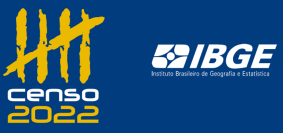


### **Ilhéus - Bahia**
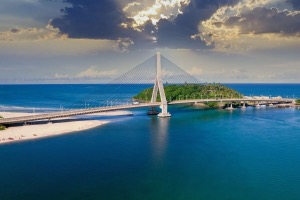


* *The purpose of this study is to analyze the data available in tha Brazilian Censo 2022 published by IBGE (The Brazilian Institute of Geography and Statistics);*

* *Censo is the main population census of Brazil;*

* *IBGE is the main provider of data and information about the Country;*

* *This analysis is focused in the Brazilian city of Ilhéus, state of Bahia.*


**Data source:**

*https://sidra.ibge.gov.br/pesquisa/censo-demografico/demografico-2022/inicial*


*For this study, the data was filtered from Bigquery to focus only in the city of Ilhéus:*

*https://console.cloud.google.com/bigquery?p=basedosdados&d=br_ibge_censo_2022*



In [1]:
#Required libraries

import os
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import google.generativeai as genai
import PIL.Image

# Importing Google AI model and API
from google.colab import userdata
api_key = userdata.get('SECRET_KEY')
genai.configure(api_key=api_key)
generation_config = {
  "temperature": 1,
  #"top_p": 0.95, # in case you need to setup
  #"top_k": 0, # in case you need to setup
  #"max_output_tokens": 8192, # in case you need to setup
}
#safety_settings = [ # in case you need to setup
#  {
#    "category": "HARM_CATEGORY_HARASSMENT",
#    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
#  },
#  {
#    "category": "HARM_CATEGORY_HATE_SPEECH",
#    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
#  },
#  {
#    "category": "HARM_CATEGORY_SEXUALLY_EXPLICIT",
#    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
#  },
#  {
#    "category": "HARM_CATEGORY_DANGEROUS_CONTENT",
#    "threshold": "BLOCK_MEDIUM_AND_ABOVE"
#  },
#]
model = genai.GenerativeModel(model_name="gemini-1.5-pro-latest",
                              generation_config=generation_config,)
                              #safety_settings=safety_settings)

#Clone public Github repository to access files
!git clone https://github.com/russopaulo/Censo_Ilheus_AI_immersion.git

#Path to where files were downloaded after filtered from Bigquery
#Files are available on public Github folder https://github.com/russopaulo/Censo_Ilheus_AI_immersion
os.chdir('/content/Censo_Ilheus_AI_immersion')

# Check if you are in the right directory
os.getcwd()


Cloning into 'Censo_Ilheus_AI_immersion'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 53 (delta 11), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (53/53), 6.04 MiB | 4.46 MiB/s, done.
Resolving deltas: 100% (11/11), done.


'/content/Censo_Ilheus_AI_immersion'

Import all datasets from Bigquery filtered

In [ ]:
#df_pop_res_mun[df_pop_res_mun['sexo'] == 'Homens']['populacao_residente'].sum()
#df_pop_res_mun[df_pop_res_mun['sexo'] == 'Mulheres']['populacao_residente'].sum()

93077.0

In [2]:
#Geo Cordinates table
df_coord = pd.read_csv('coordenada_endereco.csv')

#Demographic density table
df_area_terr_dens_dem_mun = pd.read_csv('area_territorial_densidade_demografica_municipio.csv')

#Indexes tables
df_indice_env_mun = pd.read_csv('indice_envelhecimento_municipio.csv')
df_indice_env_cor_raca_mun = pd.read_csv('indice_envelhecimento_cor_raca_municipio.csv')

#Population tables
df_pop_res_mun = pd.read_csv('populacao_residente_municipio.csv')
df_pop_res_cor_raca = pd.read_csv('populacao_residente_cor_raca_municipio.csv')






#Quilombo tables
df_quil_pop_res_mun = pd.read_csv('quilombolas_populacao_residente_municipio.csv')
df_quil_dom_1_mor_q_mun = pd.read_csv('quilombolas_domicilio_pelo_menos_um_morador_quilombola_municipio.csv')
df_quil_dom_mor_mun = pd.read_csv('quilombolas_domicilio_morador_municipio.csv')



#Residents tables
df_mor_cor_raca_tip_dom_mun = pd.read_csv('morador_cor_raca_tipo_domicilio_municipio.csv')
df_mor_cor_raca_lig_abast_agua_mun = pd.read_csv('morador_cor_raca_ligacao_abastecimento_agua_municipio.csv')
df_mor_cor_raca_esgot_san_mun = pd.read_csv('morador_cor_raca_esgotamento_sanitario_municipio.csv')
df_mor_cor_raca_dest_lix_mun = pd.read_csv('morador_cor_raca_destino_lixo_municipio.csv')

#Indigenous tables
df_indig_pop_res_mun = pd.read_csv('indigenas_populacao_residente_municipio.csv')
df_indig_pop_grup_idad_mun = pd.read_csv('indigenas_populacao_grupo_idade_municipio.csv')
df_indig_indic_env_mun = pd.read_csv('indigenas_indice_envelhecimento_municipio.csv')
df_indig_dom_1_mor_ind_mun = pd.read_csv('indigenas_domicilio_pelo_menos_um_morador_indigena_municipio.csv')
df_indig_dom_mor_mun = pd.read_csv('indigenas_domicilio_morador_municipio.csv')



#Domiciles tables
df_dom_tipo_mun = pd.read_csv('domicilio_tipo_municipio.csv')
df_dom_qtde_esgot_san_mun = pd.read_csv('domicilio_quantidade_esgotamento_sanitario_municipio.csv')
df_dom_mor_setor_censit = pd.read_csv('domicilio_morador_setor_censitario.csv')
df_dom_mor_mun = pd.read_csv('domicilio_morador_municipio.csv')
df_dom_lig_abast_agua_mun = pd.read_csv('domicilio_ligacao_abastecimento_agua_municipio.csv')
df_dom_esgot_san_mun = pd.read_csv('domicilio_esgotamento_sanitario_municipio.csv')
df_dom_dest_lix_mun = pd.read_csv('domicilio_destino_lixo_municipio.csv')
df_dom_canal_abast_agua_mun = pd.read_csv('domicilio_canalizacao_abastecimento_agua_municipio.csv')




Convert and check address type quantity

In [3]:
#Reference for especie_endereco column

#1 Domicílio particular
#2 Domicílio coletivo
#3 Estabelecimento agropecuário
#4 Estabelecimento de ensino
#5 Estabelecimento de saúde
#6 Estabelecimento de outras finalidades
#7 Edificação em construção
#8 Estabelecimento religioso

#Convert numbers to words
df_coord['especie_endereco'].replace([1, 2, 3, 4, 5, 6, 7, 8], ['Particular Dom.', 'Colective Dom.', 'Agricult. Estab.', 'Teaching Estab.', 'Health Estab.', 'Other Estab.', 'Build. u/Construct.', 'Religious Estab.'], inplace=True)

#Save on a variable to plot
address_type = df_coord['especie_endereco'].value_counts(ascending=True)


Plot address type to check

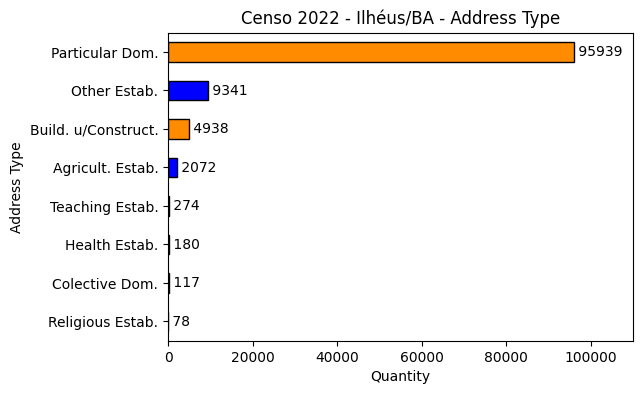

In [4]:
address_type_plot = address_type.plot(kind='barh',
                  title='Censo 2022 - Ilhéus/BA - Address Type',
                  ylabel='Address Type',
                  xlabel='Quantity',
                 color=['blue', 'darkorange'],
                  edgecolor='black',
                  figsize=(6,4),
                  xlim=(0, 110000),
                  )


for index, value in enumerate(address_type.values):
    plt.text(value, index, (' ' +
             str(value)), va='center')


Above we can see most part of establishments in Ilhéus are Particular (+95k), followed by Other (+9k) and under construction (+4k).

Below we have same numbers but showing in % scale.

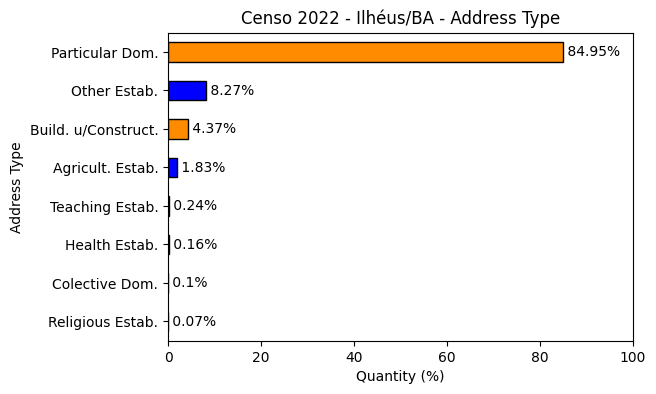

In [5]:
address_type_perc = round(df_coord['especie_endereco'].value_counts(ascending=True, normalize=True) * 100, 2)

address_type_perc_plot = address_type_perc.plot(kind='barh',
                  title='Censo 2022 - Ilhéus/BA - Address Type',
                  ylabel='Address Type',
                  xlabel='Quantity (%)',
                 color=['blue', 'darkorange'],
                  edgecolor='black',
                  figsize=(6,4),
                  xlim=(0, 100),
                  )


for index, value in enumerate(address_type_perc.values):
    plt.text(value, index, (' ' +
             str(value) + '%'), va='center')

#Convert the plot into an image
plt.savefig('address_type_perc_plot.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
#Open the saved plot image on environment and save in a variable
address_type_perc_plot_image = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/address_type_perc_plot.png')

#Pass the plot into Gemini to get more accurates insights
response = model.generate_content(('Get insights from this dataset about Ilhéus population', address_type_perc_plot_image))
print(response.text)

The overwhelming majority of addresses in Ilhéus are **Particular Dom.** (presumably "Particular Domiciles" or private residences) making up 84.95% of the total. This suggests Ilhéus is primarily a residential city.

Here are some additional observations:

* **Other Establishments** comprise the second largest category at 8.27%, highlighting a significant presence of non-residential buildings. 
* **Buildings under construction** account for 4.37%, indicating ongoing development and growth within the city.
* **Agricultural, Teaching, and Health Establishments** are present but represent a very small proportion of the total addresses.
* **Collective domiciles and Religious establishments** are negligible in their proportion, suggesting these are less common in Ilhéus.

Overall, the data paints a picture of Ilhéus as a city dominated by private residences with a notable presence of other establishments and ongoing construction, while specialized institutions like agricultural, educational

In [7]:
#Checking how many addresses were visited by the agents
df_coord.shape

(112939, 7)

Plotting points where Censo agents visited by Address Type (112939 points).

Censo 2022 visited + 112k places in Ilhéus.

Plotting an interactive map to see all these points visible, colored by address type.

In [8]:
fig = px.scatter_mapbox(df_coord, lat='latitude', lon='longitude', color='especie_endereco',
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10,
                  mapbox_style='carto-positron',
                  title='Addresses Visited - Censo 2022 - Ilhéus/BA',
                  labels={'especie_endereco': 'Address Type'})

#Save the map as html so it can be accessed from Github or on slide presentation

fig.write_html("Ilheus_2022_censo_interactive_map.html")
fig.show()

Map can be accessed on link https://sites.google.com/view/address-visit-censo2022-ios-ba/home

Some points on the map may not be 100% accurate, this is because the level (or type) of the geo coordinate.

In [9]:
#1 Endereço - coordenada original do Censo 2022
#2 Endereço - coordenada modificada (apartamentos em um mesmo número no logradouro)
#3 Endereço - coordenada estimada (endereços originalmente sem coordenadas ou coordenadas inválidas)
#4 Face de quadra
#5 Localidade
#6 Setor censitário

df_coord['nivel_geo_coordenada'].value_counts()
df_coord['nivel_geo_coordenada'].replace([1, 2, 3, 4, 5, 6], ['Address - original 2022 Census coordinate', 'Address - modified coordinate (apartments with the same number in the street)', 'Address - estimated coordinate (addresses originally without coordinates or invalid coordinates)', 'Square face', 'Location', 'Census Sector'], inplace=True)

coord_level = df_coord['nivel_geo_coordenada'].value_counts(ascending=True)


Plotting the geo coordinate level.

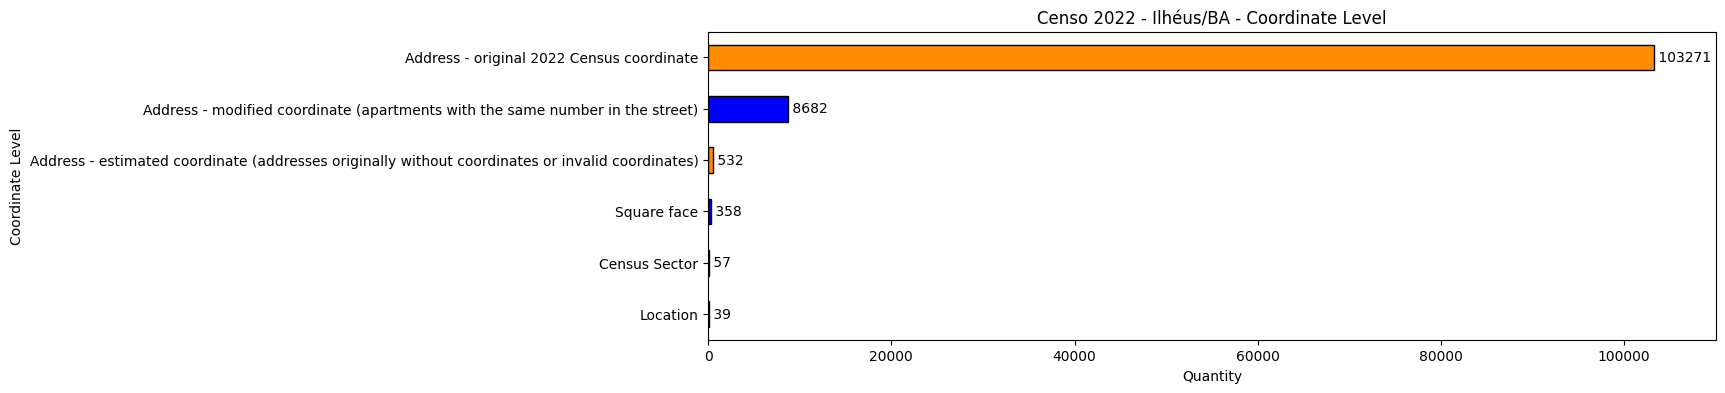

In [10]:
coord_level = df_coord['nivel_geo_coordenada'].value_counts(ascending=True)

coord_level.plot(kind='barh',
                  title='Censo 2022 - Ilhéus/BA - Coordinate Level',
                  ylabel='Coordinate Level',
                  xlabel='Quantity',
                 color=['blue', 'darkorange'],
                  edgecolor='black',
                  figsize=(13,4),
                  xlim=(0, 110000),
                  )

for index, value in enumerate(coord_level.values):
    plt.text(value, index, (' ' +
             str(value)), va='center')

Plotting again but with a % scale

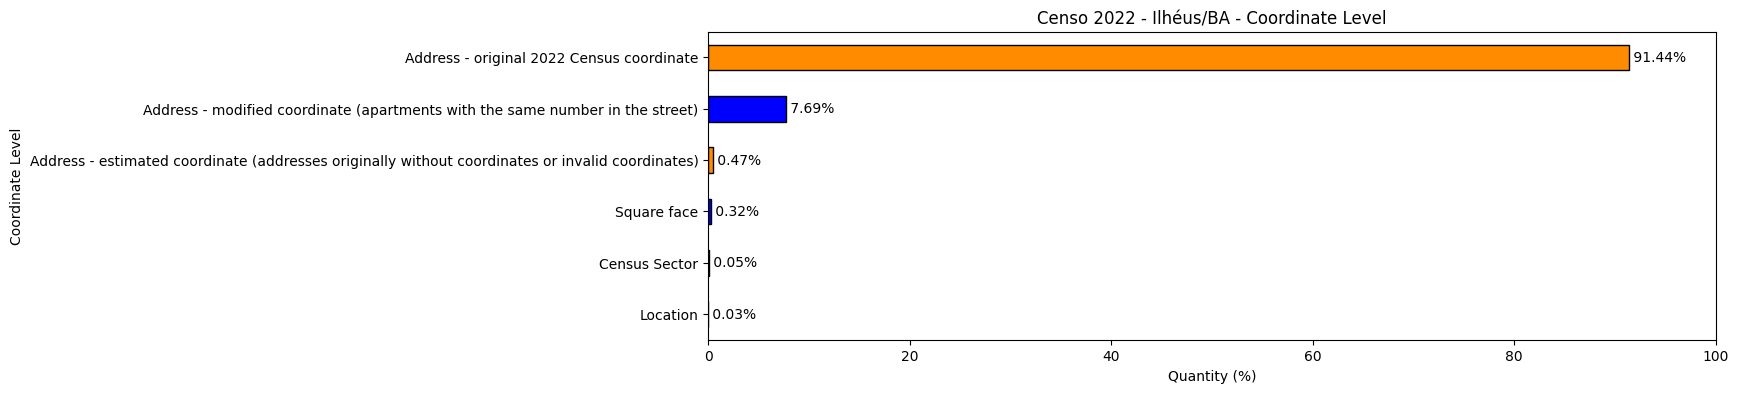

In [11]:
coord_level = round(df_coord['nivel_geo_coordenada'].value_counts(ascending=True, normalize=True) * 100, 2)

coord_level.plot(kind='barh',
                  title='Censo 2022 - Ilhéus/BA - Coordinate Level',
                  ylabel='Coordinate Level',
                  xlabel='Quantity (%)',
                 color=['blue', 'darkorange'],
                  edgecolor='black',
                  figsize=(13,4),
                  xlim=(0, 100),
                  )

for index, value in enumerate(coord_level.values):
    plt.text(value, index, (' ' +
             str(value) + '%'), va='center')

#Convert the plot into an image
plt.savefig('coord_level_plot.png', dpi=300, bbox_inches='tight')
plt.show()

About 103k addresses (91%) coordinates were originally collected on 2022, while about 8k are modified coordinates (apartments with the same number in the street). The remaining are unexpressible, less than 1000 addresses (less than 1%). We can conclude the addresses in general express the reality very well.

In [12]:
#Open the saved plot image on environment and save in a variable
coord_level_plot_image = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/coord_level_plot.png')

#Pass the plot into Gemini to get more accurates insights
response = model.generate_content(('Get insights from this dataset about Ilhéus population', coord_level_plot_image))
print(response.text)

The chart provides insights into the accuracy and origin of geographic coordinates for the population of Ilhéus, Bahia, based on the 2022 census. Here's what we can learn:

* **High accuracy of census data:** A vast majority (91.44%) of the population's addresses have the original coordinates assigned during the 2022 census. This indicates a high level of accuracy and reliability of the census data in capturing the precise locations of residents. 
* **Minor coordinate adjustments:** A small percentage (7.69%) of coordinates were modified. This suggests the original coordinates for those addresses might have been slightly off, possibly due to apartments sharing the same street number. Such modifications likely improve the accuracy of the data.
* **Limited coordinate estimation:** Only a tiny fraction (0.47%) of addresses required estimated coordinates. This indicates that the census effectively captured most residents' locations directly, minimizing reliance on estimations.
* **Minimal 

Now let's check how concentrated is the Ilhéus population and the total population.

In [13]:
popul_dens = df_area_terr_dens_dem_mun[df_area_terr_dens_dem_mun['id_municipio'] == 2913606]

popul_dens = popul_dens['populacao_residente'] / popul_dens['area_unidade_territorial']

popul_res = df_area_terr_dens_dem_mun[df_area_terr_dens_dem_mun['id_municipio'] == 2913606]

print(popul_dens)
print(popul_res['populacao_residente'])



1030    112.428571
dtype: float64
1030    178649
Name: populacao_residente, dtype: int64


Ilhéus has a demographic density of about 112 persons per square meter, pretty low, as a reference São Paulo (biggest city in Brazil) has 7382, Salvador 3486.

Ilhéus has about 178k residents in 2022, as a reference São Paulo has 11.9MI and Salvador 2.4MI.

In 2010 Ilhéus had 184k residents. We see a population decrease of 6k.

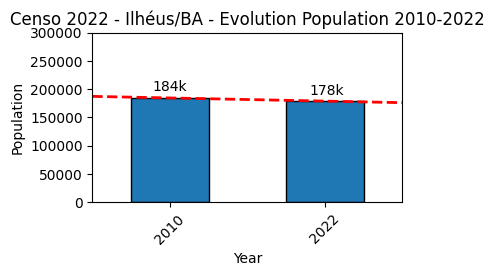

In [14]:
# The total population from 2010 was extraced from the Censo 2010 link below
# https://www.ibge.gov.br/apps/snig/v1/?loc=0,291360&cat=-1,-2,-3,128&ind=4707

d = {'Year': [2010, 2022], 'Population': [184236, 178649]}
pop_2010_2022 = pd.DataFrame(data=d)

pop_2010_2022.plot(kind='bar',
                                             x='Year',
                                             y='Population',
                                             edgecolor='black',
                                             ylabel='Population',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 300000),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution Population 2010-2022',
                                             rot=45
                                            )

plt.axline((0, 184236), (1, 178649), linewidth=2, color='r', linestyle='--')
plt.text(-0.11, 197236, '184k')
plt.text(0.9, 190649, '178k')
plt.show()

Let's check general distribution of median age, age index and sex ratio.

In [15]:
df_indice_env_mun = df_indice_env_mun[['idade_mediana', 'indice_envelhecimento', 'razao_sexo']]
df_indice_env_mun

,idade_mediana,indice_envelhecimento,razao_sexo
0,36.0,56.87,91.87


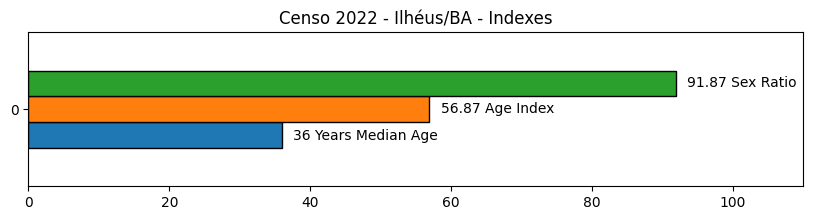

In [16]:
df_indice_env_mun.plot(kind='barh',
                        title='Censo 2022 - Ilhéus/BA - Indexes',
                        legend=False,
                        edgecolor='black',
                        figsize=(10,2),
                        xlim=(0, 110),
                       )

plt.text(37.5, -0.17, '36 Years Median Age ', va='center')
plt.text(58.5, 0, '56.87 Age Index', va='center')
plt.text(93.5, 0.17, '91.87 Sex Ratio', va='center')


plt.savefig('df_indice_env_mun_plot.png', dpi=300, bbox_inches='tight')
plt.show()


Ilhéus has an aging index of 56.87 in 2022, which means for every 56 elderly (+60 years) there are 100 children (-15 years).

Age index considers:
- a value lower than 15 as indicative of a young population;
- between 15 and 30, a population at an intermediate level;
- and over 30, an elderly population.

In this case we can consider that Ilhéus has an elderly population, besides the median age is 36.

Another interest indicator is sex ratio 91.87, which means that for every 91 men there are 100 women, an indication that the majority of population in Ilhéus is female.

In [17]:
#Open the saved plot image on environment and save in a variable
df_indice_env_mun_plot = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/df_indice_env_mun_plot.png')

#Pass the plot into Gemini to get more accurates insights
response = model.generate_content(('Get insights from this dataset about Ilhéus population', df_indice_env_mun_plot))
print(response.text)

The data reveals the following insights about the population of Ilhéus, BA in 2022:

* **Median Age:** The median age of the population is 36 years old, indicating a relatively young population. 
* **Age Index:** With a value of 56.87, the Age Index suggests that there are slightly more people under the age of 15 than over the age of 65. This supports the notion of a younger population.
* **Sex Ratio:** The Sex Ratio is 91.87, meaning there are approximately 91.87 males for every 100 females in Ilhéus. This indicates a slightly higher number of females compared to males in the population.

In summary, the dataset suggests that Ilhéus has a relatively young population with a slightly higher proportion of females. 



But Ilhéus 10 years ago was not like that, let's check the evolution of aging index, median age and sex ratio on last 12 years by race.

In [18]:
#df_indice_env_cor_raca_mun.drop('id_municipio', axis=1, inplace=True)

parda = df_indice_env_cor_raca_mun[df_indice_env_cor_raca_mun['cor_raca'] == 'Parda']
preta = df_indice_env_cor_raca_mun[df_indice_env_cor_raca_mun['cor_raca'] == 'Preta']
branca = df_indice_env_cor_raca_mun[df_indice_env_cor_raca_mun['cor_raca'] == 'Branca']
amarela = df_indice_env_cor_raca_mun[df_indice_env_cor_raca_mun['cor_raca'] == 'Amarela']
indigena = df_indice_env_cor_raca_mun[df_indice_env_cor_raca_mun['cor_raca'] == 'Indígena']

parda, preta, branca, amarela, indigena

(    ano  id_municipio cor_raca  indice_envelhecimento  idade_mediana  \
 0  2010       2913606    Parda                  36.23             27   
 1  2022       2913606    Parda                  79.63             36   
 
    razao_sexo  
 0       93.53  
 1       90.73  ,
     ano  id_municipio cor_raca  indice_envelhecimento  idade_mediana  \
 2  2010       2913606    Preta                  47.72             29   
 3  2022       2913606    Preta                  95.33             36   
 
    razao_sexo  
 2      102.98  
 3       97.23  ,
     ano  id_municipio cor_raca  indice_envelhecimento  idade_mediana  \
 4  2010       2913606   Branca                  52.44             30   
 5  2022       2913606   Branca                 102.50             37   
 
    razao_sexo  
 4       89.52  
 5       87.98  ,
     ano  id_municipio cor_raca  indice_envelhecimento  idade_mediana  \
 6  2010       2913606  Amarela                  24.88             26   
 7  2022       2913606  Amarela    

Plotting all cases

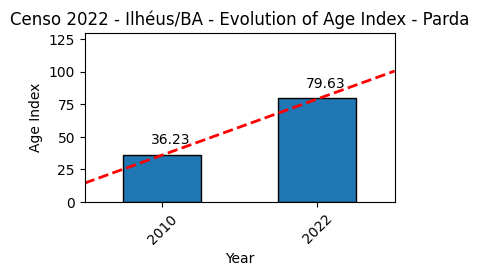

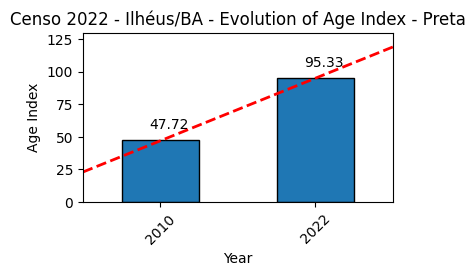

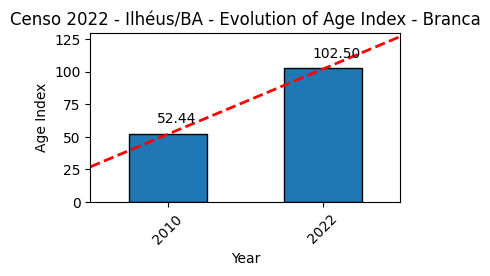

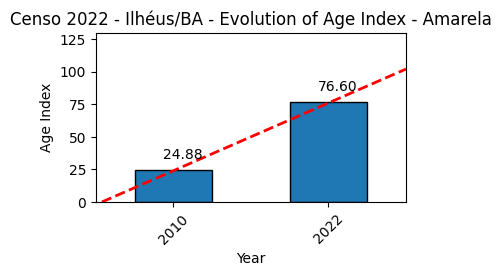

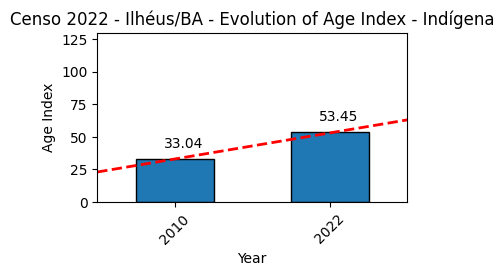

In [19]:
parda[['ano', 'indice_envelhecimento']].plot(kind='bar',
                                             x='ano',
                                             y='indice_envelhecimento',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Age Index - Parda',
                                             rot=45
                                            )

plt.axline((0, 36), (1, 79), linewidth=2, color='r', linestyle='--')
plt.text(-0.07, 45, '36.23')
plt.text(0.93, 88, '79.63')
plt.savefig('parda_env_index.png', dpi=300, bbox_inches='tight')
plt.show()



preta[['ano', 'indice_envelhecimento']].plot(kind='bar',
                                             x='ano',
                                             y='indice_envelhecimento',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Age Index - Preta',
                                             rot=45
                                            )

plt.axline((0, 47), (1, 95), linewidth=2, color='r', linestyle='--')
plt.text(-0.07, 56, '47.72')
plt.text(0.93, 104, '95.33')
plt.savefig('preta_env_index.png', dpi=300, bbox_inches='tight')
plt.show()



branca[['ano', 'indice_envelhecimento']].plot(kind='bar',
                                             x='ano',
                                             y='indice_envelhecimento',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Age Index - Branca',
                                             rot=45
                                            )

plt.axline((0, 52), (1, 102), linewidth=2, color='r', linestyle='--')
plt.text(-0.07, 61, '52.44')
plt.text(0.93, 111, '102.50')
plt.savefig('branca_env_index.png', dpi=300, bbox_inches='tight')
plt.show()



amarela[['ano', 'indice_envelhecimento']].plot(kind='bar',
                                             x='ano',
                                             y='indice_envelhecimento',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Age Index - Amarela',
                                             rot=45
                                            )

plt.axline((0, 24), (1, 76), linewidth=2, color='r', linestyle='--')
plt.text(-0.07, 33, '24.88')
plt.text(0.93, 85, '76.60')
plt.savefig('amarela_env_index.png', dpi=300, bbox_inches='tight')
plt.show()



indigena[['ano', 'indice_envelhecimento']].plot(kind='bar',
                                             x='ano',
                                             y='indice_envelhecimento',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Age Index - Indígena',
                                             rot=45
                                            )

plt.axline((0, 33), (1, 53), linewidth=2, color='r', linestyle='--')
plt.text(-0.07, 42, '33.04')
plt.text(0.93, 62, '53.45')
plt.savefig('indigena_env_index.png', dpi=300, bbox_inches='tight')
plt.show()

Age Index by race brings interesting information. All races had an increase in the the last 12 years.

However the increase was not the same:

- Indígena (indigenous) +20.42
- Parda (black mixed with white) +43.49
- Preta (black) +47.61
- Branca (while) +50.06
- Amarela (yellow - asian) +51.72

We can see that indigenous people had the lower increase, half of 2nd race Parda.

Observing from this point we can say that indigenous people were the ones who got less elderly while Asian people got more.

In [21]:
#Open the saved plot images on environment and save in variables
parda_env_index = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/parda_env_index.png')
preta_env_index = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/preta_env_index.png')
branca_env_index = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/branca_env_index.png')
amarela_env_index = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/amarela_env_index.png')
indigena_env_index = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/indigena_env_index.png')

#Pass the plots into Gemini to get more accurates insights
response = model.generate_content(('Get insights from these datasets about Ilhéus population', parda_env_index,                                                                                              preta_env_index,
                                                                                              branca_env_index,
                                                                                              amarela_env_index,
                                                                                              indigena_env_index))
print(response.text)

The datasets show the evolution of the Age Index in Ilhéus between 2010 and 2022 for different racial groups. Here are some insights:

* **Aging Population:** All racial groups show a significant increase in the Age Index, indicating an aging population in Ilhéus. This means the proportion of older people within each racial group is increasing.
* **Fastest Aging:** The Branca (White) population has the highest Age Index in both years and shows the most significant increase, suggesting a faster aging trend compared to other groups.
* **Slowest Aging:** The Amarela (Yellow) population, despite a large percentage increase, still has the lowest Age Index in both years and shows a comparatively slower aging trend.
* **Disparities:** There are noticeable disparities in the Age Index between different racial groups. This highlights potential differences in life expectancy, birth rates, and socioeconomic factors among these groups.
* **Future Implications:** The continuous aging trend across a

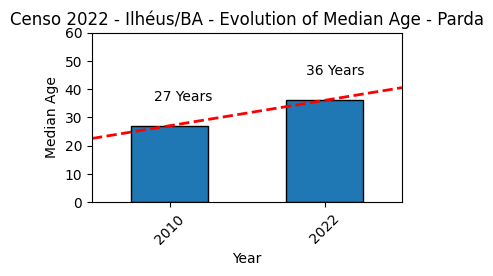

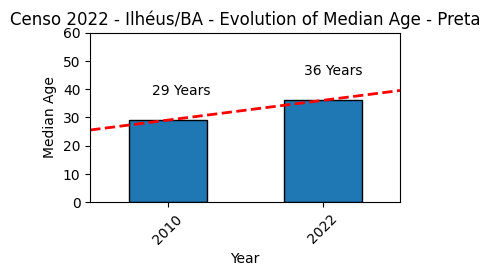

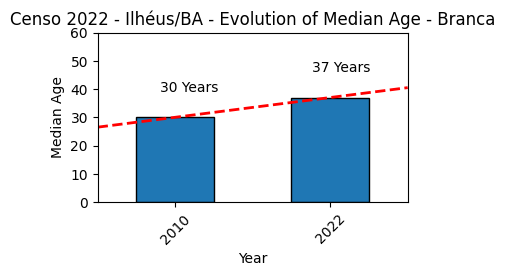

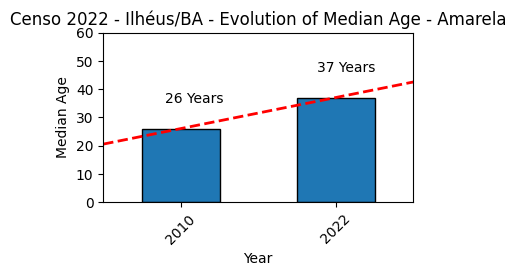

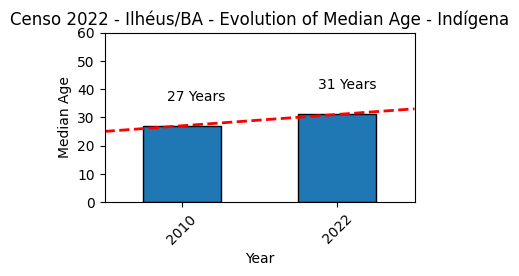

In [22]:
parda[['ano', 'idade_mediana']].plot(kind='bar',
                                             x='ano',
                                             y='idade_mediana',
                                             edgecolor='black',
                                             ylabel='Median Age',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 60),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Median Age - Parda',
                                             rot=45
                                            )

plt.axline((0, 27), (1, 36), linewidth=2, color='r', linestyle='--')
plt.text(-0.1, 36, '27 Years')
plt.text(0.88, 45, '36 Years')
plt.savefig('parda_med_age.png', dpi=300, bbox_inches='tight')
plt.show()


preta[['ano', 'idade_mediana']].plot(kind='bar',
                                             x='ano',
                                             y='idade_mediana',
                                             edgecolor='black',
                                             ylabel='Median Age',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 60),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Median Age - Preta',
                                             rot=45
                                            )

plt.axline((0, 29), (1, 36), linewidth=2, color='r', linestyle='--')
plt.text(-0.1, 38, '29 Years')
plt.text(0.88, 45, '36 Years')
plt.savefig('preta_med_age.png', dpi=300, bbox_inches='tight')
plt.show()


branca[['ano', 'idade_mediana']].plot(kind='bar',
                                             x='ano',
                                             y='idade_mediana',
                                             edgecolor='black',
                                             ylabel='Median Age',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 60),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Median Age - Branca',
                                             rot=45
                                            )

plt.axline((0, 30), (1, 37), linewidth=2, color='r', linestyle='--')
plt.text(-0.1, 39, '30 Years')
plt.text(0.88, 46, '37 Years')
plt.savefig('branca_med_age.png', dpi=300, bbox_inches='tight')
plt.show()


amarela[['ano', 'idade_mediana']].plot(kind='bar',
                                             x='ano',
                                             y='idade_mediana',
                                             edgecolor='black',
                                             ylabel='Median Age',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 60),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Median Age - Amarela',
                                             rot=45
                                            )

plt.axline((0, 26), (1, 37), linewidth=2, color='r', linestyle='--')
plt.text(-0.1, 35, '26 Years')
plt.text(0.88, 46, '37 Years')
plt.savefig('amarela_med_age.png', dpi=300, bbox_inches='tight')
plt.show()


indigena[['ano', 'idade_mediana']].plot(kind='bar',
                                             x='ano',
                                             y='idade_mediana',
                                             edgecolor='black',
                                             ylabel='Median Age',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 60),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Median Age - Indígena',
                                             rot=45
                                            )

plt.axline((0, 27), (1, 31), linewidth=2, color='r', linestyle='--')
plt.text(-0.1, 36, '27 Years')
plt.text(0.88, 40, '31 Years')
plt.savefig('indigena_med_age.png', dpi=300, bbox_inches='tight')
plt.show()


Regarding Median Age by race, we also see an increase in the the last 12 years.

However the increase was also not the same:

- Indígena (indigenous) +4 Years
- Preta (black) +7 Years
- Branca (while) +7 Years
- Parda (black mixed with white) +9 Years
- Amarela (yellow - asian) +11 Years

We can see that indigenous people again had the lower increase, almost half of 2nd races Black and White.

Observing from this point we can say that indigenous people again were the ones who got less elderly while Asian again people got more.

In [23]:
#Open the saved plot images on environment and save in variables
parda_med_age = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/parda_med_age.png')
preta_med_age = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/preta_med_age.png')
branca_med_age = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/branca_med_age.png')
amarela_med_age = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/amarela_med_age.png')
indigena_med_age = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/indigena_med_age.png')

#Pass the plots into Gemini to get more accurates insights
response = model.generate_content(('Get insights from these datasets about Ilhéus population', parda_med_age,
                                                                                              preta_med_age,
                                                                                              branca_med_age,
                                                                                              amarela_med_age,
                                                                                              indigena_med_age))
print(response.text)

The data, representing the median age evolution of different racial groups in Ilhéus/BA from 2010 to 2022, reveals several insights:

**General Trend:**

* **Aging Population:**  Across all racial groups, there's a clear trend of an aging population. The median age has increased significantly from 2010 to 2022. This suggests declining birth rates and potentially increasing life expectancy within these populations.

**Racial Differences:**

* **Branca Group:** The *Branca* (White) population has the highest median age in both 2010 (30 years) and 2022 (37 years), indicating this group is older compared to others. This could reflect socioeconomic factors, healthcare access, or other demographic influences.
* **Parda and Preta Groups:** The *Parda* (Brown) and *Preta* (Black) groups show similar median ages in both years, suggesting a relatively similar age structure in these populations.
* **Amarela and Indígena Groups:** The *Amarela* (Yellow) and *Indígena* (Indigenous) groups start wit

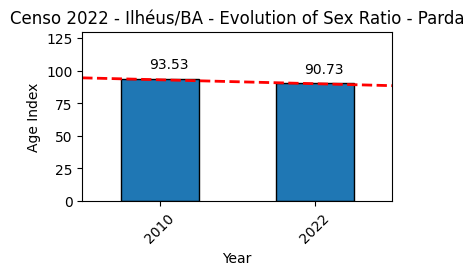

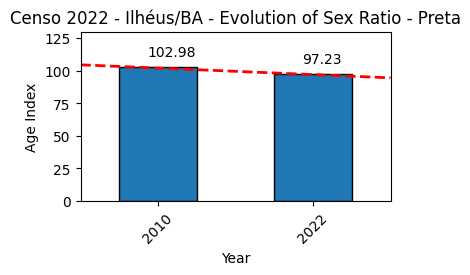

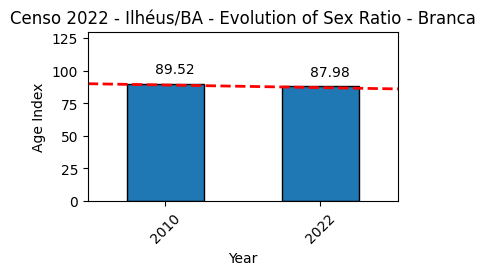

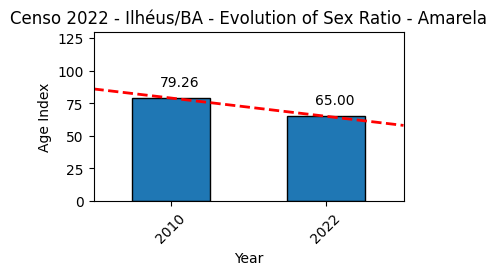

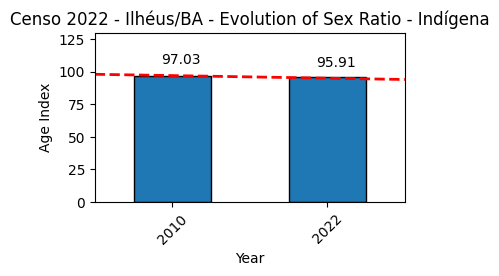

In [24]:
parda[['ano', 'razao_sexo']].plot(kind='bar',
                                             x='ano',
                                             y='razao_sexo',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Sex Ratio - Parda',
                                             rot=45
                                            )

plt.axline((0, 93), (1, 90), linewidth=2, color='r', linestyle='--')
plt.text(-0.07, 102, '93.53')
plt.text(0.93, 98, '90.73')
plt.savefig('parda_sex_ratio.png', dpi=300, bbox_inches='tight')
plt.show()


preta[['ano', 'razao_sexo']].plot(kind='bar',
                                             x='ano',
                                             y='razao_sexo',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Sex Ratio - Preta',
                                             rot=45
                                            )

plt.axline((0, 102), (1, 97), linewidth=2, color='r', linestyle='--')
plt.text(-0.07, 111, '102.98')
plt.text(0.93, 106, '97.23')
plt.savefig('preta_sex_ratio.png', dpi=300, bbox_inches='tight')
plt.show()


branca[['ano', 'razao_sexo']].plot(kind='bar',
                                             x='ano',
                                             y='razao_sexo',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Sex Ratio - Branca',
                                             rot=45
                                            )

plt.axline((0, 89), (1, 87), linewidth=2, color='r', linestyle='--')
plt.text(-0.07, 98, '89.52')
plt.text(0.93, 96, '87.98')
plt.savefig('branca_sex_ratio.png', dpi=300, bbox_inches='tight')
plt.show()


amarela[['ano', 'razao_sexo']].plot(kind='bar',
                                             x='ano',
                                             y='razao_sexo',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Sex Ratio - Amarela',
                                             rot=45
                                            )

plt.axline((0, 79), (1, 65), linewidth=2, color='r', linestyle='--')
plt.text(-0.07, 88, '79.26')
plt.text(0.93, 74, '65.00')
plt.savefig('amarela_sex_ratio.png', dpi=300, bbox_inches='tight')
plt.show()


indigena[['ano', 'razao_sexo']].plot(kind='bar',
                                             x='ano',
                                             y='razao_sexo',
                                             edgecolor='black',
                                             ylabel='Age Index',
                                             xlabel='Year',
                                             figsize=(4,2.2),
                                             ylim=(0, 130),
                                             legend=False,
                                             title='Censo 2022 - Ilhéus/BA - Evolution of Sex Ratio - Indígena',
                                             rot=45
                                            )

plt.axline((0, 97), (1, 95), linewidth=2, color='r', linestyle='--')
plt.text(-0.07, 106, '97.03')
plt.text(0.93, 104, '95.91')
plt.savefig('indigena_sex_ratio.png', dpi=300, bbox_inches='tight')
plt.show()


Regarding Sex Ratio by race, we see a decrease in all races in the last 12 years. Which means in general the male population decreases while the female increased.

However as expected, the decrease was also not the same:

- Indígena (indigenous) -1.12
- Branca (while) -1.54
- Parda (black mixed with white) -2.8
- Preta (black) -5.75
- Amarela (yellow - asian) -14.26

We can see that indigenous people again had the lower increase on female population, compared to the biggest is about 14 times less.

It's also interesting to observe that only Black people had more men in 2010 and now female in 2022.

Indigenous and Black people have the most distributed polulation between men and women (indexes 95.91 and 97.23 - 100 means equal distribution), while Asian people has the less distributed with big majority women (index 65).

In [25]:
#Open the saved plot images on environment and save in variables
parda_sex_ratio = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/parda_sex_ratio.png')
preta_sex_ratio = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/preta_sex_ratio.png')
branca_sex_ratio = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/branca_sex_ratio.png')
amarela_sex_ratio = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/amarela_sex_ratio.png')
indigena_sex_ratio = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/indigena_sex_ratio.png')

#Pass the plots into Gemini to get more accurates insights
response = model.generate_content(('Get insights from these datasets about Ilhéus population', parda_sex_ratio,
                                                                                              preta_sex_ratio,
                                                                                              branca_sex_ratio,
                                                                                              amarela_sex_ratio,
                                                                                              indigena_sex_ratio))
print(response.text)

The charts show the evolution of the sex ratio in Ilhéus, Brazil, from 2010 to 2022, broken down by race. Here are some insights we can glean:

* **Overall Trend:** Across all racial groups, there's a general trend of the sex ratio (number of males per 100 females) decreasing from 2010 to 2022. This means the proportion of females in Ilhéus is slightly increasing.
* **Highest Sex Ratio:** In both 2010 and 2022, the Black population had the highest sex ratio, indicating a larger proportion of males within this group compared to others. 
* **Lowest Sex Ratio:** The "Amarela" (Yellow) population consistently shows the lowest sex ratio, meaning there's a significantly higher proportion of females within this racial category in Ilhéus.
* **Significant Drop:** The most significant drop in the sex ratio is observed in the "Amarela" population, decreasing from 79.26 in 2010 to 65.00 in 2022. This suggests a growing imbalance between males and females within this demographic.
* **Slight Changes

Now let's check the proportion of Men x Women

In [26]:
men_women = df_pop_res_mun[['sexo', 'populacao_residente']].replace(['Homens', 'Mulheres'], ['Men', 'Women']).groupby('sexo').sum()
men_women



,populacao_residente
sexo,
Men,85524.0
Women,93077.0


In [27]:

men_women_new = pd.DataFrame(data=[[85524.0, 93077.0]], columns=['Men', 'Women'], index=['Sex'])
men_women_new

,Men,Women
Sex,85524.0,93077.0


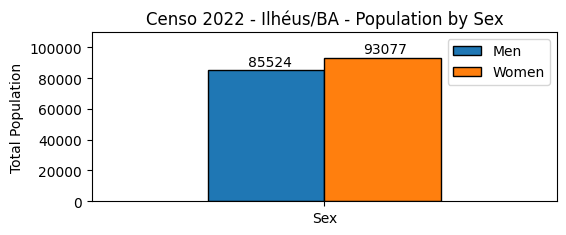

In [28]:
men_women_new.plot(kind='bar',
               ylabel='Total Population',
               figsize=(6,2.2),
               ylim=(0, 110000),
               title='Censo 2022 - Ilhéus/BA - Population by Sex',
               rot=0,
               edgecolor='black')

plt.text(-0.165, 87524, '85524')
plt.text(0.084, 96077, '93077')

plt.show()

85k Men x 93k Women in Ilhéus, let's check in %

In [29]:
men_women_perc = ((men_women/men_women.sum())*100)
men_women_perc

men_women_perc_new = pd.DataFrame(data=[[47.88551, 52.11449]], columns=['Men', 'Women'], index=['Sex'])
men_women_perc_new


,Men,Women
Sex,47.88551,52.11449


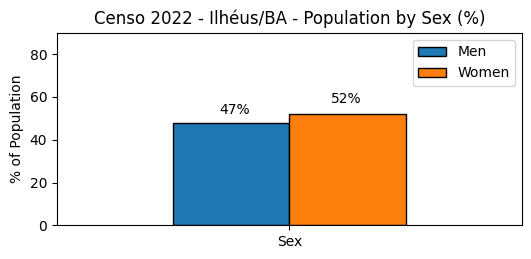

In [30]:
men_women_perc_new.plot(kind='bar',
               ylabel='% of Population',
               figsize=(6,2.5),
               ylim=(0, 90),
               title='Censo 2022 - Ilhéus/BA - Population by Sex (%)',
               rot=0,
               edgecolor='black'
                                            )

plt.text(-0.15, 52, '47%')
plt.text(0.09, 57, '52%')

plt.show()

Population of Women in 2022 is 5% higher than men, and compared to 2010, the female population seems to be increasing.

Regarding age, during Censo 2022 we had date of birth (DOB) checked and presumed, let's check it.

In [31]:
dec_age = df_pop_res_mun[['forma_declaracao_idade', 'populacao_residente', 'sexo']].replace(['Data de nascimento', 'Idade presumida', 'Homens', 'Mulheres'], ['Real DOB', 'Presumed DOB', 'Men', 'Women']).groupby(['forma_declaracao_idade', 'sexo']).sum()
dec_age


dec_age_new = pd.DataFrame(data=[[16670.0, 15575.0], [68854.0, 77502.0]], columns=['Men', 'Women'], index=['Presumed DOB', 'Real DOB'])
dec_age_new


,Men,Women
Presumed DOB,16670.0,15575.0
Real DOB,68854.0,77502.0


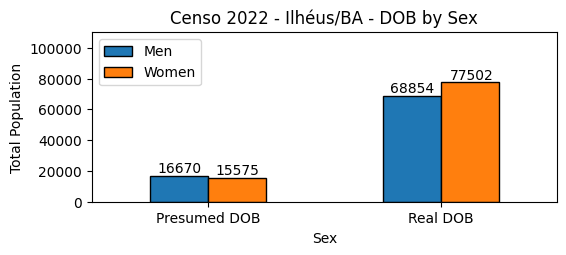

In [32]:
dec_age_new.plot(kind='bar',
               ylabel='Total Population',
               xlabel='Sex',
               figsize=(6,2.2),
               ylim=(0, 110000),
               rot=0,
               title='Censo 2022 - Ilhéus/BA - DOB by Sex',
               edgecolor='black'
                                            )

plt.text(-0.22, 18770, '16670')
plt.text(0.03, 17575, '15575')
plt.text(0.78, 70854, '68854')
plt.text(1.04, 79502, '77502')

plt.show()

In [33]:
dec_age_perc = (dec_age / dec_age.sum())*100
dec_age_perc

dec_age_perc_new = pd.DataFrame(data=[[9.333654, 8.720556], [38.551856, 43.393934]], columns=['Men', 'Women'], index=['Presumed DOB', 'Real DOB'])
dec_age_perc_new

,Men,Women
Presumed DOB,9.333654,8.720556
Real DOB,38.551856,43.393934


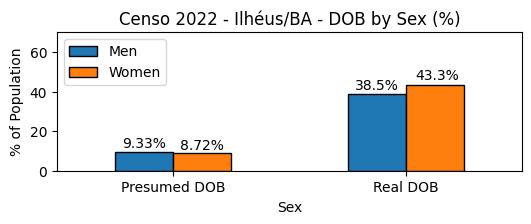

In [34]:
dec_age_perc_new.plot(kind='bar',
               ylabel='% of Population',
               xlabel='Sex',
               figsize=(6,1.8),
               ylim=(0, 70),
               title='Censo 2022 - Ilhéus/BA - DOB by Sex (%)',
               edgecolor='black',
               rot=0

                                            )

plt.text(-0.22, 12, '9.33%')
plt.text(0.03, 11, '8.72%')
plt.text(0.78, 41, '38.5%')
plt.text(1.04, 46, '43.3%')
plt.savefig('dec_age_perc_new.png', dpi=300, bbox_inches='tight')
plt.show()

We can conclude here that regarding age, about 18% of the ages were not really collected but presumed by the agent, only 82% is real DOB

It seems well distributed by sex.

In [36]:
#Open the saved plot image on environment and save in a variable
dec_age_perc_new = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/dec_age_perc_new.png')

#Pass the plot into Gemini to get more accurates insights
response = model.generate_content(('Get insights from this dataset about Ilhéus population', dec_age_perc_new))
print(response.text)

This data from the 2022 census in Ilhéus, Bahia shows the percentage of the population with real and presumed dates of birth (DOB) broken down by sex. Here are some insights:

* **Higher Real DOB Reporting:**  A significantly larger percentage of the population has a recorded real DOB (38.5% men, 43.3% women) compared to those with a presumed DOB (9.33% men, 8.72% women). This suggests that birth registration practices in Ilhéus have improved over time.
* **Gender Discrepancy in Presumed DOB:**  A slightly higher percentage of men have a presumed DOB than women. This could indicate historical disparities in birth registration practices, potentially favoring boys over girls.
* **Overall DOB Accuracy:**  The higher percentage of real DOBs across both genders is a positive sign, reflecting better record-keeping and potentially improvements in access to birth registration services.

**Further considerations:**

* It would be helpful to understand the historical context of birth registratio

Let's check how distributed is the Age Groups.

In [37]:
#This is to correct idade_anos column and create a proper age_group, there are many division here and this is not necessary
df_pop_res_mun_copy = df_pop_res_mun

age_ranges = []
for i in df_pop_res_mun['idade_anos']:
    if math.isnan(i):
        age_ranges.append('-12 Years')

    elif i < 12:
        age_ranges.append('-12 Years')

    elif i >= 12 and i <18:
        age_ranges.append('12 to 17 Years')

    elif i >= 18 and i <65:
        age_ranges.append('18 to 65 Years')

    else:
        age_ranges.append('+65 Years')

df_pop_res_mun_copy['idade_anos_corr'] = age_ranges

df_pop_res_mun_copy

,id_municipio,forma_declaracao_idade,sexo,idade,idade_anos,grupo_idade,populacao_residente,idade_anos_corr
0,2913606,Data de nascimento,Homens,1 mês,NaN,100 anos ou mais,68.0,-12 Years
1,2913606,Idade presumida,Homens,2 anos,2.00,0 a 4 anos,131.0,-12 Years
2,2913606,Idade presumida,Mulheres,2 anos,2.00,0 a 4 anos,117.0,-12 Years
3,2913606,Data de nascimento,Mulheres,3 anos,3.00,0 a 4 anos,952.0,-12 Years
4,2913606,Data de nascimento,Mulheres,5 anos,5.00,5 a 9 anos,892.0,-12 Years
...,...,...,...,...,...,...,...,...
439,2913606,Idade presumida,Homens,3 meses,0.25,0 a 4 anos,9.0,-12 Years
440,2913606,Idade presumida,Homens,94 anos,94.00,90 a 94 anos,10.0,+65 Years
441,2913606,Idade presumida,Mulheres,95 anos,95.00,95 a 99 anos,10.0,+65 Years
442,2913606,Idade presumida,Homens,91 anos,91.00,90 a 94 anos,12.0,+65 Years


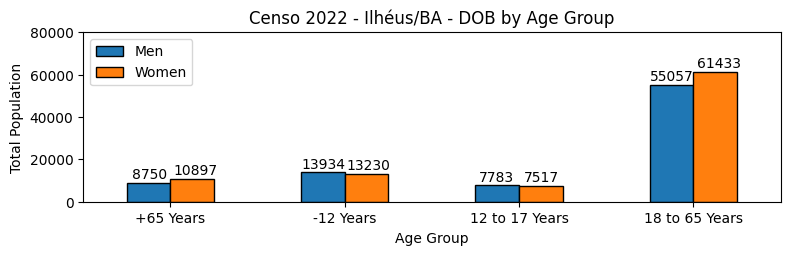

In [38]:
#select proper columns
pop_age_sex = df_pop_res_mun[['idade_anos_corr', 'populacao_residente', 'sexo']].replace(['Homens', 'Mulheres'], ['Men', 'Women']).groupby(['idade_anos_corr', 'sexo']).sum()

#create a new dataset because the group by output doesn't allow to change bar colors
pop_age_sex_new = pd.DataFrame(data=[[8750.0, 10897.0], [13934.0, 13230.0], [7783.0, 7517.0], [55057.0, 61433.0]], columns=['Men', 'Women'], index=['+65 Years', '-12 Years', '12 to 17 Years', '18 to 65 Years'])
pop_age_sex_new

#plot
pop_age_sex_new.plot(kind='bar',
               ylabel='Total Population',
               xlabel='Age Group',
               figsize=(9,2.2),
               ylim=(0, 80000),
               title='Censo 2022 - Ilhéus/BA - DOB by Age Group',
               rot=0,
               edgecolor='black',
                                            )

plt.text(-0.22, 10770, '8750')
plt.text(0.75, 15575, '13934')
plt.text(1.77, 9783, '7783')
plt.text(2.75, 57057, '55057')

plt.text(0.02, 12897, '10897')
plt.text(1.01, 15230, '13230')
plt.text(2.03, 9517, '7517')
plt.text(3.02, 63433, '61433')


plt.show()

Most part of Ilhéus population is in the 18 to 65 years range, followed by less than 12, more than 65 and 12 to 17.

By sex it seems well distributed, with female slighly higher.

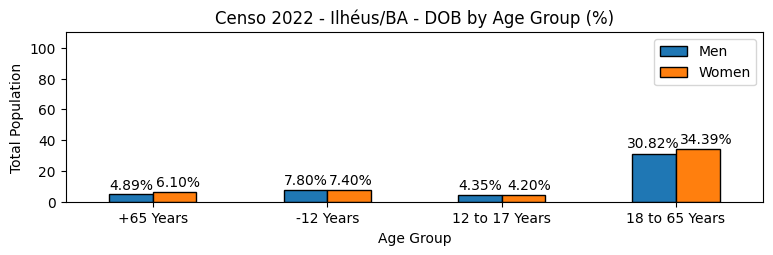

In [39]:
#convert to %
pop_age_sex_perc = (pop_age_sex / pop_age_sex.sum())*100

#create a new dataset because the group by output doesn't allow to change bar colors
pop_age_sex_perc_new = pd.DataFrame(data=[[4.89, 6.10], [7.80, 7.40], [4.35, 4.20], [30.82, 34.39]], columns=['Men', 'Women'], index=['+65 Years', '-12 Years', '12 to 17 Years', '18 to 65 Years'])
pop_age_sex_perc_new

#plot
pop_age_sex_perc_new.plot(kind='bar',
               ylabel='Total Population',
               xlabel='Age Group',
               figsize=(9,2.2),
               ylim=(0, 110),
               title='Censo 2022 - Ilhéus/BA - DOB by Age Group (%)',
               rot=0,
               edgecolor='black',
                                            )

plt.text(-0.25, 8, '4.89%')
plt.text(0.75, 11, '7.80%')
plt.text(1.75, 8, '4.35%')
plt.text(2.72, 35, '30.82%')

plt.text(0.02, 10, '6.10%')
plt.text(1.01, 11, '7.40%')
plt.text(2.03, 8, '4.20%')
plt.text(3.02, 38, '34.39%')
plt.savefig('pop_age_sex_perc_new.png', dpi=300, bbox_inches='tight')
plt.show()

Same as before but in percentage.

- +65% of Ilhéus population is in the 18 to 65 years range;
- +15% less than 12;
- +11% more than 65;
- +8% from 12 to 17.

In [40]:
#Open the saved plot image on environment and save in a variable
pop_age_sex_perc_new = PIL.Image.open('/content/Censo_Ilheus_AI_immersion/pop_age_sex_perc_new.png')

#Pass the plot into Gemini to get more accurates insights
response = model.generate_content(('Get insights from this dataset about Ilhéus population', pop_age_sex_perc_new))
print(response.text)

This chart illustrates the population distribution in Ilhéus, Bahia, based on age and gender, according to the 2022 census. Here are some key insights:

* **Working-age population dominates:** The most significant portion of the population falls within the 18 to 65 years age group, comprising 30.82% men and 34.39% women. This indicates a robust working-age population.
* **Relatively small elderly and youth populations:** The age groups of +65 years and -12 years have notably smaller percentages compared to the 18-65 group. This suggests a potentially lower dependency ratio (ratio of dependents to the working-age population).
* **Balanced gender distribution:** Across all age groups, the percentages of men and women are relatively close.  This suggests a relatively balanced gender ratio in Ilhéus.
* **Slight female dominance in working-age:**  Women slightly outnumber men in the 18 to 65 age range, pointing to a possible higher female participation in the workforce. 

Overall, the chart

In [41]:
#This is to correct idade_anos column and create a proper age_group, there are many division here and this is not necessary
df_pop_res_cor_raca_copy = df_pop_res_cor_raca

age_ranges1 = []
for i in df_pop_res_cor_raca_copy['grupo_idade']:

    if i == '0 a 4 anos' or i == '5 a 9 anos':
       age_ranges1.append('0 to 9 Years')

    elif i == '10 a 14 anos' or i == '15 a 19 anos':
      age_ranges1.append('10 to 19 Years')

    elif i == '20 a 24 anos' or i == '25 a 29 anos':
      age_ranges1.append('20 to 29 Years')

    elif i == '30 a 34 anos' or i == '35 a 39 anos':
      age_ranges1.append('30 to 39 Years')

    elif i == '40 a 44 anos' or i == '45 a 49 anos':
      age_ranges1.append('40 to 49 Years')

    elif i == '50 a 54 anos' or i == '55 a 59 anos':
      age_ranges1.append('50 to 59 Years')

    elif i == '60 a 64 anos' or i == '65 a 69 anos':
      age_ranges1.append('60 to 69 Years')

    elif i == '70 a 74 anos' or i == '75 a 79 anos':
      age_ranges1.append('70 to 79 Years')

    else:
      age_ranges1.append('+80 Years')

df_pop_res_cor_raca_copy['grupo_idade_corr'] = age_ranges1

df_pop_res_cor_raca_copy

,ano,id_municipio,grupo_idade,sexo,cor_raca,populacao_residente,grupo_idade_corr
0,2022,2913606,0 a 4 anos,Homens,Parda,3080.0,0 to 9 Years
1,2022,2913606,0 a 4 anos,Mulheres,Branca,1062.0,0 to 9 Years
2,2010,2913606,0 a 4 anos,Mulheres,Amarela,63.0,0 to 9 Years
3,2022,2913606,0 a 4 anos,Mulheres,Indígena,331.0,0 to 9 Years
4,2010,2913606,0 a 4 anos,Homens,Indígena,149.0,0 to 9 Years
...,...,...,...,...,...,...,...
415,2022,2913606,100 anos ou mais,Homens,Branca,6.0,+80 Years
416,2022,2913606,100 anos ou mais,Mulheres,Preta,7.0,+80 Years
417,2010,2913606,100 anos ou mais,Homens,Parda,8.0,+80 Years
418,2010,2913606,100 anos ou mais,Mulheres,Preta,10.0,+80 Years


In [149]:
pop_age_race_parda_2010_df_perc = (pop_age_race_parda_2010_df / pop_age_race_parda_2010_df.sum()) * 100

parda_men_values_2010_perc = list(pop_age_race_parda_2010_df_perc['Men'].values)
parda_women_values_2010_perc = list(pop_age_race_parda_2010_df_perc['Women'].values)
parda_comb_men_women_2010_perc = [[parda_men_values_2010_perc[i], parda_women_values_2010_perc[i]] for i in range(len(parda_men_values_2010_perc))]

parda_comb_men_women_2010_perc


[[1.1859600720389318, 1.5465118362812036],
 [17.70318427405449, 15.981219647689194],
 [19.609533662873126, 18.486461301363725],
 [17.603555964287082, 17.914807447628263],
 [14.589799593823043, 15.267996344282567],
 [12.24661838525501, 13.067397810153574],
 [9.056596543664023, 9.214558357077577],
 [5.174924320803157, 5.284662114940057],
 [2.829827183201134, 3.2363851405838395]]

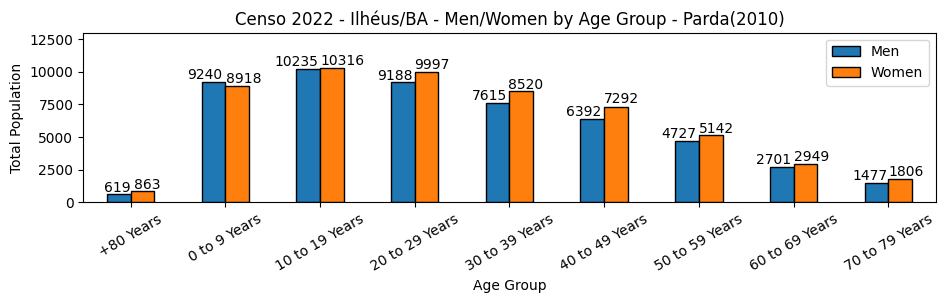

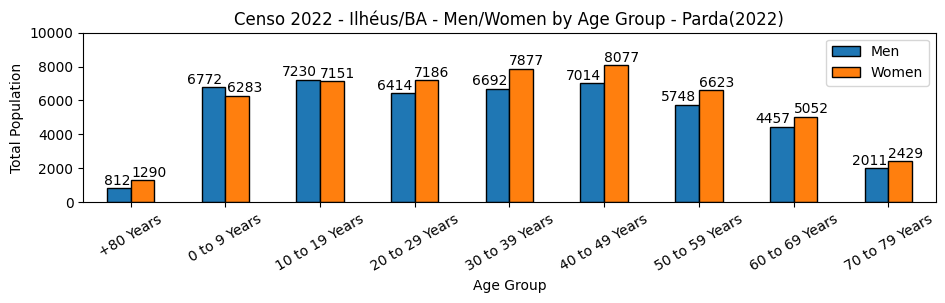

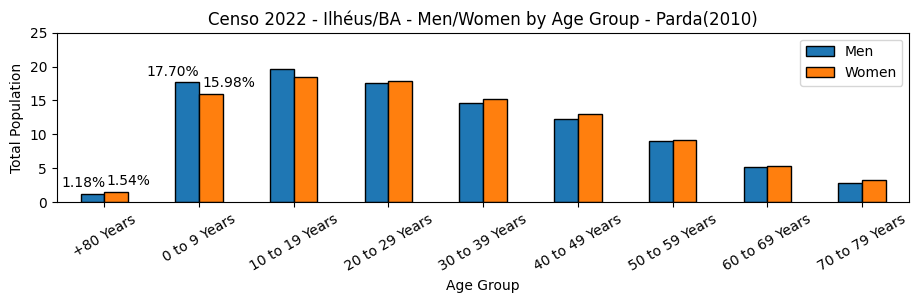

,Men,Women
+80 Years,1.185960,1.546512
0 to 9 Years,17.703184,15.981220
10 to 19 Years,19.609534,18.486461
20 to 29 Years,17.603556,17.914807
30 to 39 Years,14.589800,15.267996
40 to 49 Years,12.246618,13.067398
50 to 59 Years,9.056597,9.214558
60 to 69 Years,5.174924,5.284662
70 to 79 Years,2.829827,3.236385


In [207]:
from sys import platform
#Get the sum and reset index of the required data
pop_age_race = df_pop_res_cor_raca_copy[['ano', 'grupo_idade_corr', 'sexo', 'cor_raca', 'populacao_residente']].replace(['Homens', 'Mulheres'], ['Men', 'Women']).groupby(['ano', 'grupo_idade_corr', 'sexo', 'cor_raca']).sum().reset_index()


#Generate 2 small views to get the values for the plot Parda 2010
parda_men_values_2010 = list(pop_age_race[(pop_age_race['ano'] == 2010) &  (pop_age_race['cor_raca'] == 'Parda') &
 (pop_age_race['sexo'] == 'Men')]['populacao_residente'].values)

parda_women_values_2010 = list(pop_age_race[(pop_age_race['ano'] == 2010) & (pop_age_race['cor_raca'] == 'Parda') &
 (pop_age_race['sexo'] == 'Women')]['populacao_residente'].values)

parda_comb_men_women_2010 = [[parda_men_values_2010[i], parda_women_values_2010[i]] for i in range(len(parda_men_values_2010))]


#List of categories to be used as indexes in the following plots
age_range_every_10_years_list = ['+80 Years', '0 to 9 Years', '10 to 19 Years', '20 to 29 Years',
                         '30 to 39 Years', '40 to 49 Years', '50 to 59 Years', '60 to 69 Years',
                         '70 to 79 Years']


#Create a plot based on the data
pop_age_race_parda_2010_df = pd.DataFrame(data=parda_comb_men_women_2010,
                          columns=['Men', 'Women'],
                          index=age_range_every_10_years_list)

pop_age_race_parda_2010_df.plot(kind='bar',
                                ylabel='Total Population',
                                xlabel='Age Group',
                                figsize=(11,2.2),
                                ylim=(0, 13000),
                                title='Censo 2022 - Ilhéus/BA - Men/Women by Age Group - Parda(2010)',
                                rot=30,
                                edgecolor='black',
                                                  )

plt.text(-0.28, 769, '619'), plt.text(0.04, 983, '863'), plt.text(0.6, 9440, '9240'), plt.text(1.01, 9118, '8918')
plt.text(1.52, 10435, '10235') , plt.text(2.0, 10516, '10316'), plt.text(2.6, 9388, '9188'), plt.text(2.99, 10197, '9997')
plt.text(3.6, 7815, '7615'), plt.text(3.99, 8720, '8520'), plt.text(4.6, 6592, '6392'), plt.text(5.0, 7592, '7292')
plt.text(5.6, 4927, '4727'), plt.text(6.0, 5342, '5142'), plt.text(6.6, 2901, '2701'), plt.text(7.0, 3149, '2949')
plt.text(7.62, 1677, '1477'), plt.text(8.0, 2006, '1806')
plt.show()



#Generate 2 small views to get the values for the plot Parda 2022
parda_men_values_2022 = list(pop_age_race[(pop_age_race['ano'] == 2022) & (pop_age_race['cor_raca'] == 'Parda') &
 (pop_age_race['sexo'] == 'Men')]['populacao_residente'].values)

parda_women_values_2022 = list(pop_age_race[(pop_age_race['ano'] == 2022) & (pop_age_race['cor_raca'] == 'Parda') &
 (pop_age_race['sexo'] == 'Women')]['populacao_residente'].values)

parda_comb_men_women_2022 = [[parda_men_values_2022[i], parda_women_values_2022[i]] for i in range(len(parda_men_values_2022))]


#Create a plot based on the data
pop_age_race_parda_2022_df = pd.DataFrame(data=parda_comb_men_women_2022,
                          columns=['Men', 'Women'],
                          index=age_range_every_10_years_list)

pop_age_race_parda_2022_df.plot(kind='bar',
                                ylabel='Total Population',
                                xlabel='Age Group',
                                figsize=(11,2.2),
                                ylim=(0, 10000),
                                title='Censo 2022 - Ilhéus/BA - Men/Women by Age Group - Parda(2022)',
                                rot=30,
                                edgecolor='black',
                                                  )

plt.text(-0.28, 1012, '812'), plt.text(0.01, 1490, '1290'), plt.text(0.6, 6972, '6772'), plt.text(1.02, 6483, '6283')
plt.text(1.6, 7430, '7230') , plt.text(2.0, 7351, '7151'), plt.text(2.6, 6614, '6414'), plt.text(2.99, 7386, '7186')
plt.text(3.6, 6892, '6692'), plt.text(3.99, 8077, '7877'), plt.text(4.6, 7214, '7014'), plt.text(5.0, 8277, '8077')
plt.text(5.6, 5948, '5748'), plt.text(6.0, 6823, '6623'), plt.text(6.6, 4657, '4457'), plt.text(7.0, 5252, '5052')
plt.text(7.62, 2211, '2011'), plt.text(8.0, 2629, '2429')
plt.show()


#Parda 2010 in %
pop_age_race_parda_2010_df_perc = (pop_age_race_parda_2010_df / pop_age_race_parda_2010_df.sum()) * 100

parda_men_values_2010_perc = list(pop_age_race_parda_2010_df_perc['Men'].values)
parda_women_values_2010_perc = list(pop_age_race_parda_2010_df_perc['Women'].values)
parda_comb_men_women_2010_perc = [[parda_men_values_2010_perc[i], parda_women_values_2010_perc[i]] for i in range(len(parda_men_values_2010_perc))]


pop_age_race_parda_2010_df_perc = pd.DataFrame(data=parda_comb_men_women_2010_perc,
                                              columns=['Men', 'Women'],
                                              index=age_range_every_10_years_list)


pop_age_race_parda_2010_df_perc.plot(kind='bar',
                                ylabel='Total Population',
                                xlabel='Age Group',
                                figsize=(11,2.2),
                                ylim=(0, 25),
                                title='Censo 2022 - Ilhéus/BA - Men/Women by Age Group - Parda(2010)',
                                rot=30,
                                edgecolor='black',
                                                  )
#Men	Women
#+80 Years
#0 to 9 Years
#10 to 19 Years	19.609534	18.486461
#20 to 29 Years	17.603556	17.914807
#30 to 39 Years	14.589800	15.267996
#40 to 49 Years	12.246618	13.067398
#50 to 59 Years	9.056597	9.214558
#60 to 69 Years	5.174924	5.284662
#70 to 79 Years	2.829827	3.236385

plt.text(-0.45, 2.18, '1.18%'), plt.text(0.02, 2.54, '1.54%'), plt.text(0.45, 18.70, '17.70%'), plt.text(1.04, 16.98, '15.98%')


plt.show()

pop_age_race_parda_2010_df_perc





#Generate 2 small views to get the values for the plot Amarela 2010
#pop_age_race[(pop_age_race['ano'] == 2010) &
# (pop_age_race['cor_raca'] == 'Amarela') &
# (pop_age_race['sexo'] == 'Men')][['grupo_idade_corr', 'sexo', 'populacao_residente']]

#pop_age_race[(pop_age_race['ano'] == 2010) &
# (pop_age_race['cor_raca'] == 'Amarela') &
# (pop_age_race['sexo'] == 'Women')][['grupo_idade_corr', 'sexo', 'populacao_residente']]

#Create a plot based on the data
#pop_age_race_amarela_2010 =  pd.DataFrame(data=[[5.0, 11.0], [142.0, 128.0], [158.0, 182.0], [164.0, 235.0],
#                                  [127.0, 166.0], [92.0, 136.0], [44.0, 73.0], [24.0, 28.0], [20.0, 20.0]],
#                                  columns=['Men', 'Women'],
#                                  index=age_range_every_10_years_list).plot(kind='bar',
#                                                  ylabel='Total Population',
#                                                  xlabel='Age Group',
#                                                  figsize=(11.225,2.2),
#                                                  ylim=(0, 300),
#                                                  title='Censo 2022 - Ilhéus/BA - Men/Women by Age Group - Amarela(2010)',
#                                                  rot=30,
#                                                  edgecolor='black',
#                                                  )


#plt.text(-0.15, 15, '5'), plt.text(0.05, 20, '11'), plt.text(0.72, 150, '142'), plt.text(1.01, 135, '128')
#plt.text(1.70, 165, '158') , plt.text(2.0, 190, '182'), plt.text(2.71, 170, '164'), plt.text(2.99, 243, '235')
#plt.text(3.71, 137, '127'), plt.text(3.99, 176, '166'), plt.text(4.78, 102, '92'), plt.text(5.0, 146, '136')
#plt.text(5.77, 54, '44'), plt.text(6.05, 83, '73'), plt.text(6.77, 34, '24'), plt.text(7.05, 38, '28')
#plt.text(7.77, 30, '20'), plt.text(8.02, 30, '20')
#plt.show()
